# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import key_dict
owm_key = key_dict['open_weather']

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../expected_output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
# units = 'imperial'
city_data = []

print('Beginning Data Retrieval')
print('-----------------------------')

record_count = 1
set_count = 1

#--For testing--
# sub_cities = cities[0:3]
# query_url = f'{url}appid={owm_key}&{units}&q='
# response = requests.get(query_url + city).json()
# pprint(response)

for city in cities:
    
    query_url = f'{url}appid={owm_key}&units=imperial&q='
    
    try:
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
        response = requests.get(query_url + city).json()
        
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        
        city_data.append({'City': city,
                         'Lat': lat,
                         'Lng': lon,
                         'Max Temp': max_temp,
                         'Humidity': humidity,
                         'Cloudiness': cloudiness,
                         'Wind Speed': wind_speed,
                         'Country': country,
                         'Date': date})
        
        record_count += 1
        if (record_count > 50):
            set_count += 1
            record_count = 0
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | sancti spiritus
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | tizimin
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ponta delgada
Processing Record 11 of Set 1 | nelson bay
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | wierden
Processing Record 15 of Set 1 | gamba
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | benavente
Processing Record 18 of Set 1 | komsomolskiy
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | roma
Processing Record 21 of Set 1 | 

Processing Record 16 of Set 4 | saint-philippe
Processing Record 17 of Set 4 | selikhino
Processing Record 18 of Set 4 | ngama
Processing Record 19 of Set 4 | katsuura
Processing Record 20 of Set 4 | abu kamal
Processing Record 21 of Set 4 | vardo
Processing Record 22 of Set 4 | vung tau
Processing Record 23 of Set 4 | karabuk
Processing Record 24 of Set 4 | tucuman
Processing Record 25 of Set 4 | maldonado
Processing Record 26 of Set 4 | bam
Processing Record 27 of Set 4 | odweyne
Processing Record 28 of Set 4 | itupiranga
Processing Record 29 of Set 4 | taburi
City not found. Skipping...
Processing Record 29 of Set 4 | sabang
Processing Record 30 of Set 4 | belogorsk
Processing Record 31 of Set 4 | sao miguel do tapuio
Processing Record 32 of Set 4 | pisco
Processing Record 33 of Set 4 | thompson
Processing Record 34 of Set 4 | touros
Processing Record 35 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 4 | parabel
Processing Record 36 of Set 4 | antofag

Processing Record 39 of Set 7 | ucluelet
Processing Record 40 of Set 7 | oistins
Processing Record 41 of Set 7 | longlac
City not found. Skipping...
Processing Record 41 of Set 7 | kuusamo
Processing Record 42 of Set 7 | kurilsk
Processing Record 43 of Set 7 | khvorostyanka
Processing Record 44 of Set 7 | cortez
Processing Record 45 of Set 7 | macaboboni
City not found. Skipping...
Processing Record 45 of Set 7 | bubaque
Processing Record 46 of Set 7 | tubuala
Processing Record 47 of Set 7 | nurota
Processing Record 48 of Set 7 | koosa
Processing Record 49 of Set 7 | bathsheba
Processing Record 50 of Set 7 | boyabat
Processing Record 0 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 0 of Set 8 | clyde river
Processing Record 1 of Set 8 | chengmai
City not found. Skipping...
Processing Record 1 of Set 8 | sahbuz
Processing Record 2 of Set 8 | zhucheng
Processing Record 3 of Set 8 | dunedin
Processing Record 4 of Set 8 | kathmandu
Processing Record 5 of Set 8 | oksfj

Processing Record 13 of Set 11 | mae hong son
Processing Record 14 of Set 11 | ahipara
Processing Record 15 of Set 11 | sorong
Processing Record 16 of Set 11 | zhigansk
Processing Record 17 of Set 11 | sokoni
Processing Record 18 of Set 11 | marzuq
Processing Record 19 of Set 11 | noumea
Processing Record 20 of Set 11 | rocha
Processing Record 21 of Set 11 | trincomalee
Processing Record 22 of Set 11 | yeppoon
Processing Record 23 of Set 11 | leningradskiy
Processing Record 24 of Set 11 | tamworth
Processing Record 25 of Set 11 | beloha
Processing Record 26 of Set 11 | ayagoz
Processing Record 27 of Set 11 | barcelos
Processing Record 28 of Set 11 | cap-chat
Processing Record 29 of Set 11 | alenquer
Processing Record 30 of Set 11 | bonthe
Processing Record 31 of Set 11 | kupang
Processing Record 32 of Set 11 | mendoza
Processing Record 33 of Set 11 | hatillo
Processing Record 34 of Set 11 | marv dasht
City not found. Skipping...
Processing Record 34 of Set 11 | kamenskoye
City not foun

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file, encoding='utf-8')

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sancti spiritus,21.9297,-79.4425,85.73,42,0,7.14,CU,1615932484
1,bredasdorp,-34.5322,20.0403,60.80,94,16,2.30,ZA,1615932485
2,cape town,-33.9258,18.4232,66.20,68,20,21.85,ZA,1615932389
3,punta arenas,-53.1500,-70.9167,50.00,66,75,23.02,CL,1615932484
4,albany,42.6001,-73.9662,33.01,27,99,5.23,US,1615932313
...,...,...,...,...,...,...,...,...,...
563,banting,2.8167,101.5000,77.00,94,40,2.30,MY,1615932706
564,guzelyurt,38.2772,34.3719,39.20,65,75,4.61,TR,1615932707
565,brainerd,46.3580,-94.2008,35.01,69,90,3.44,US,1615932409
566,baruun-urt,46.6806,113.2792,18.54,61,46,8.30,MN,1615932707


In [5]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.743132,18.883092,53.955070,71.205986,52.725352,7.655440,1.615933e+09
std,32.313944,91.104104,27.667939,21.938784,37.805386,5.554709,1.071415e+02
min,-54.800000,-175.200000,-43.890000,2.000000,0.000000,0.310000,1.615932e+09
25%,-3.761175,-59.520850,35.600000,61.750000,18.750000,3.470000,1.615933e+09
50%,24.970250,22.186100,61.640000,76.000000,59.500000,6.305000,1.615933e+09
75%,47.245775,98.522200,77.000000,88.000000,90.000000,10.012500,1.615933e+09
max,78.218600,178.416700,98.600000,100.000000,100.000000,37.670000,1.615933e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

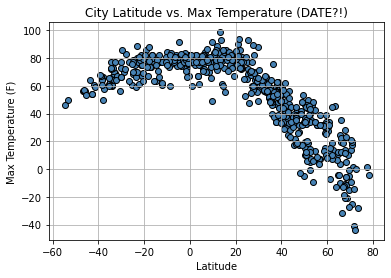

In [8]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (DATE?!)')
#-------------ASK ABOUT DATE?? WHAT DATE?!--------------
plt.grid(True)
plt.savefig('../expected_output/Fig1_Lat_vs_Max_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

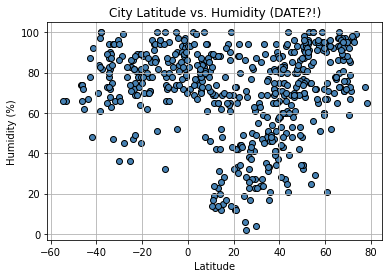

In [9]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (DATE?!)')
plt.grid(True)
plt.savefig('../expected_output/Fig2_Lat_vs_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

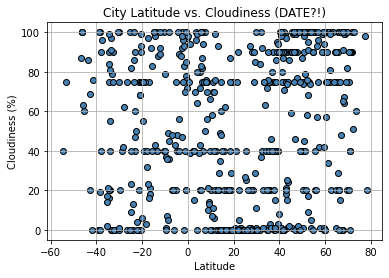

In [10]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (DATE?!)')
plt.grid(True)
plt.savefig('../expected_output/Fig3_Lat_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

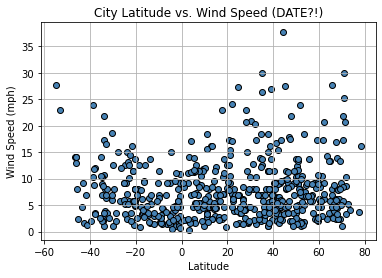

In [11]:
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            c='steelblue',
            edgecolor='black'
           )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (DATE?!)')
plt.grid(True)
plt.savefig('../expected_output/Fig4_Lat_vs_Wind_Speed.png')
plt.show()

## Linear Regression

In [23]:
northern_hemisphere_df = city_data_df.loc[(city_data_df['Lat']) > 0, :]
northern_hemisphere_df
southern_hemisphere_df = city_data_df.loc[(city_data_df['Lat']) < 0, :]
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bredasdorp,-34.5322,20.0403,60.80,94,16,2.30,ZA,1615932485
2,cape town,-33.9258,18.4232,66.20,68,20,21.85,ZA,1615932389
3,punta arenas,-53.1500,-70.9167,50.00,66,75,23.02,CL,1615932484
8,busselton,-33.6500,115.3333,64.00,63,0,3.80,AU,1615932201
10,nelson bay,-32.7167,152.1500,69.01,94,90,3.44,AU,1615932487
...,...,...,...,...,...,...,...,...,...
551,araguari,-18.6472,-48.1872,73.40,83,75,12.66,BR,1615932701
556,isangel,-19.5500,169.2667,82.40,78,75,6.91,VU,1615932703
558,horqueta,-23.3428,-57.0597,88.66,49,47,5.26,PY,1615932704
560,camacupa,-12.0167,17.4833,62.35,96,100,3.44,AO,1615932705


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8896501045329497


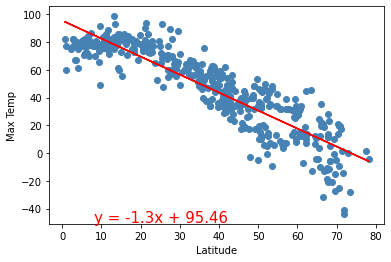

In [24]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Max Temp'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Max Temp'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(8,-50),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Max_Temp_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# In the northern hemisphere- as latitude increases, max temperature
# decreases. There is a strong correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6794679947259136


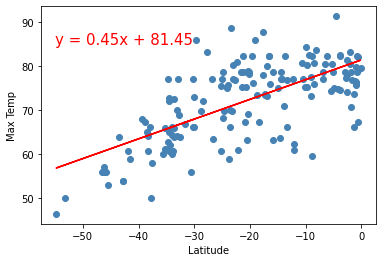

In [25]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Max Temp'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Max Temp'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-55, 85),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Max_Temp_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# In the southern hemisphere- as latitude decreases, max 
# temperature increases. There is a strong correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27603839107137224


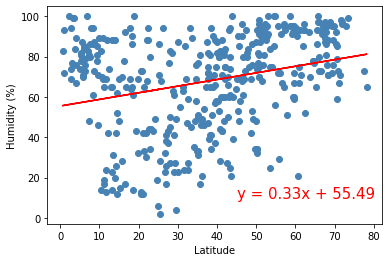

In [26]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Humidity'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Humidity'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Humidity_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# In the northern hemisphere- as latitude increases, percent 
# humidity increases. There is very little to no correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20756155709763124


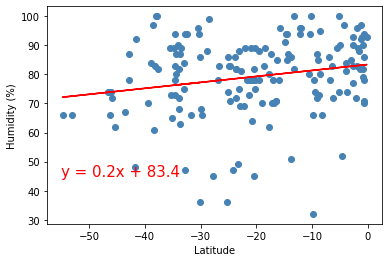

In [27]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Humidity'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Humidity'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Humidity_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.27537822514685045


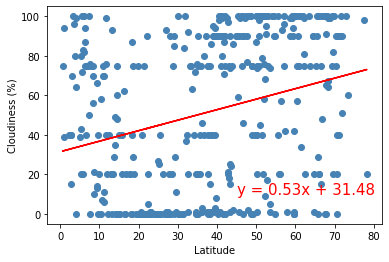

In [28]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Cloudiness'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Cloudiness'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Cloudiness_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08344169634242653


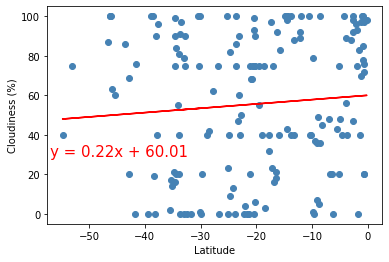

In [29]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Cloudiness'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Cloudiness'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-57,29),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Cloudiness_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04252445518476148


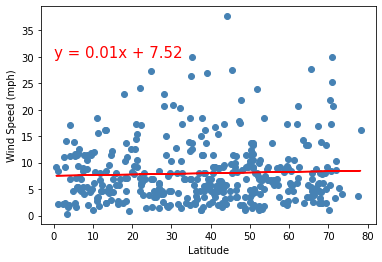

In [30]:
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Wind Speed'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],
                                                        northern_hemisphere_df['Wind Speed'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
regress_values = northern_hemisphere_df['Lat'] * slope + intercept
plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/North-Wind_Speed_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We cannot say that there is any correlation in this data. 
# We can say however that at all Northern latitudes Wind Speeds
# do not vary much from the linear regression model.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3955480659902281


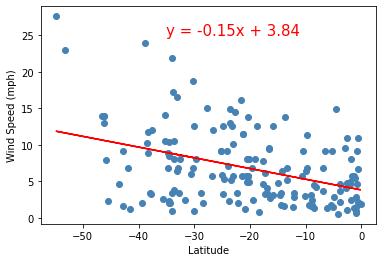

In [32]:
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Wind Speed'],
            c='steelblue'
           )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'],
                                                        southern_hemisphere_df['Wind Speed'])
print(f'The r-value is: {rvalue}')
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line_eq,(-35,25),fontsize=15,color="red")
regress_values = southern_hemisphere_df['Lat'] * slope + intercept
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.savefig('../expected_output/South-Wind_Speed_vs_Lat.png')
plt.show()

In [ ]:
# explain what the linear regression is modeling
# describe any relationships you notice and any other analysis 
# you may have

# We can say that there is a weak correlation that follows the 
# linear regression model 